In [1]:
!pip install --upgrade setuptools pip --user
!pip install --ignore-installed PyYAML
!pip install Pillow

!pip install nvidia-pyindex
!pip install --upgrade nvidia-tensorrt
!pip install pycuda

!pip install protobuf<4.21.3
!pip install onnxruntime-gpu
!pip install onnx>=1.9.0
!pip install onnx-simplifier>=0.3.6 --user

     |████████████████████████████████| 1.2 MB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 29.1 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.2/701.2 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8418 sha256=0bd37241e44a598b05a36b1426a280c43a14ee6862dcf00c7546844449160837
  Stored in directory: /root/.cache/pip/wheels/e0/c2/fb/5cf4e1cfaf28007238362cb746fb38fc2dd76348331a748d54
Successfully built nvidia-pyindex
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.9/340.9 MB 15.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 07:01:05) 
[GCC 9.3.0], sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0) 
Pytorch version: 1.10.0a0+3fd9dcf 


In [4]:
!nvidia-smi

Wed Sep 21 13:14:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:09:00.0 Off |                  N/A |
| 30%   30C    P8    16W / 300W |    180MiB / 11016MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!# Download YOLOv7 code
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!ls

Cloning into 'yolov7'...
remote: Enumerating objects: 409, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 409 (delta 118), reused 88 (delta 82), pack-reused 260
Receiving objects: 100% (409/409), 17.46 MiB | 22.44 MiB/s, done.
Resolving deltas: 100% (190/190), done.
/content/yolov7
cfg			   export.py   models		 tools
data			   figure      README.md	 train_aux.py
detect.py		   hubconf.py  requirements.txt  train.py
end2end_onnxruntime.ipynb  inference   scripts		 utils
end2end_tensorrt.ipynb	   LICENSE.md  test.py


In [5]:
# !# Download trained weights
# !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

In [18]:
!ls /py/yolov7

EfficientNMS.py  data		 figure      requirements.txt  train_aux.py
LICENSE.md	 deploy		 hubconf.py  scripts	       utils
README.md	 detect.py	 inference   test.py
__pycache__	 export.py	 models      tools
cfg		 export_onnx.py  paper	     train.py


In [17]:
!python /py/yolov7/detect.py --weights /py/best.pt --conf 0.25 --img-size 640 --source /py/crop/9/3.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/py/crop/9/3.jpg', update=False, view_img=False, weights=['/py/best.pt'])
YOLOR 🚀 v0.1-111-gb1850c7 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11016.3125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36907898 parameters, 6194944 gradients, 104.5 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 bicycle, Done. (8.3ms) Inference, (0.8ms) NMS
 The image with the result is saved in: runs/detect/exp/3.jpg
Done. (0.056s)


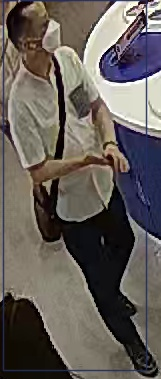

In [19]:
from PIL import Image
Image.open('runs/detect/exp/3.jpg')

In [19]:
# export temporary ONNX model for TensorRT converter
!python /py/yolov7/export.py --weights /py/best.pt --batch-size 64 --grid --end2end --simplify --topk-all 100 --iou-thres 0.45 --conf-thres 0.25 --img-size 640 640
# !ls 

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(batch_size=64, conf_thres=0.25, device='cpu', dynamic=False, dynamic_batch=False, end2end=True, fp16=False, grid=True, img_size=[640, 640], include_nms=False, int8=False, iou_thres=0.45, max_wh=None, simplify=True, topk_all=100, weights='/py/best.pt')
YOLOR 🚀 v0.1-111-gb1850c7 torch 1.10.0a0+3fd9dcf CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36907898 parameters, 6194944 gradients, 104.5 GFLOPS

Starting TorchScript export with torch 1.10.0a0+3fd9dcf...
/py/yolov7/models/yolo.py:150: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.grid[i].shape[2:4] != x[i].shape[2:4]:
TorchScript export s

In [21]:
# Download ONNX to TensorRT converter
# %cd ../
!git clone https://github.com/Linaom1214/tensorrt-python.git

Cloning into 'tensorrt-python'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 231 (delta 15), reused 12 (delta 12), pack-reused 211
Receiving objects: 100% (231/231), 76.87 MiB | 5.61 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [21]:
!ls /py/ped

Dockerfile			 osnet_c.ckpt
README.md			 pickle_sample_dch_1.mp4.p
Vanjie_pranav			 pickle_sample_sales_2.mp4.p
YOLOv7_Tensorrt			 pickle_sample_sales_3.mp4.p
all_crops.pkl			 pickle_sample_sales_4.mp4.p
annotated_sample_casetify_1.mp4  requirements.txt
annotated_sample_crowd.mp4	 salesperson
annotated_sample_dch_1.mp4	 salesperson.tar
annotated_sample_sales_2.mp4	 sample_casetify_1.mp4
annotated_sample_sales_3.mp4	 sample_crowd.mp4
annotated_sample_sales_4.mp4	 sample_dch_1.mp4
annotated_videos		 sample_sales_2.mp4
best.onnx			 sample_sales_3.mp4
best.pt				 sample_sales_4.mp4
best.torchscript.pt		 src
best.torchscript.ptl		 test2.jpg
best.trt			 tools
best_ckpt.pth			 torchreid
crop				 trt_inf.py
dockerfile_onnx			 video
dockerfile_trt			 yolov7
exps				 yolov7_fp16.engine
notebooks			 yolov7_trt.py
osnet_ain_ms_m_c.pth.tar	 yolox


In [20]:
# Export TensorRT-engine model 
!python /py/yolov7/tools/tensorrt-python/export.py -o /py/best.onnx -e /py/ped_yolov764.trt -p fp16

Namespace(calib_batch_size=8, calib_cache='./calibration.cache', calib_input=None, calib_num_images=5000, conf_thres=0.4, end2end=False, engine='/py/ped_yolov764.trt', iou_thres=0.5, max_det=100, onnx='/py/best.onnx', precision='fp16', verbose=False, workspace=1)
[TensorRT] INFO: [MemUsageChange] Init CUDA: CPU +321, GPU +0, now: CPU 342, GPU 3607 (MiB)
[TensorRT] WARNING: onnx2trt_utils.cpp:362: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
[TensorRT] WARNING: onnx2trt_utils.cpp:390: One or more weights outside the range of INT32 was clamped
[TensorRT] INFO: No importer registered for op: EfficientNMS_TRT. Attempting to import as plugin.
[TensorRT] INFO: Searching for plugin: EfficientNMS_TRT, plugin_version: 1, plugin_namespace: 
[TensorRT] INFO: Successfully created plugin: EfficientNMS_TRT
Network Description
Input 'images' with shape (64, 3, 640, 640) and dtype DataType.FLOAT
Output 'num_det

In [1]:
import cv2
import torch
import random
import time
import numpy as np
import tensorrt as trt
from PIL import Image
from pathlib import Path
from collections import OrderedDict,namedtuple

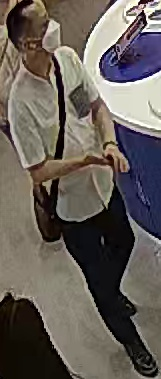

In [13]:
w = '/py/best.trt'
device = torch.device('cuda:0')
img = cv2.imread('/py/crop/9/3.jpg')
Image.open('/py/crop/9/3.jpg')

In [14]:
# Infer TensorRT Engine
Binding = namedtuple('Binding', ('name', 'dtype', 'shape', 'data', 'ptr'))
logger = trt.Logger(trt.Logger.INFO)
trt.init_libnvinfer_plugins(logger, namespace="")
with open(w, 'rb') as f, trt.Runtime(logger) as runtime:
    model = runtime.deserialize_cuda_engine(f.read())
bindings = OrderedDict()
for index in range(model.num_bindings):
    name = model.get_binding_name(index)
    dtype = trt.nptype(model.get_binding_dtype(index))
    shape = tuple(model.get_binding_shape(index))
    data = torch.from_numpy(np.empty(shape, dtype=np.dtype(dtype))).to(device)
    bindings[name] = Binding(name, dtype, shape, data, int(data.data_ptr()))
binding_addrs = OrderedDict((n, d.ptr) for n, d in bindings.items())
context = model.create_execution_context()


def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

def postprocess(boxes,r,dwdh):
    dwdh = torch.tensor(dwdh*2).to(boxes.device)
    boxes -= dwdh
    boxes /= r
    return boxes

names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 
         'hair drier', 'toothbrush']
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

[TensorRT] WARNING: The logger passed into createInferRuntime differs from one already provided for an existing builder, runtime, or refitter. TensorRT maintains only a single logger pointer at any given time, so the existing value, which can be retrieved with getLogger(), will be used instead. In order to use a new logger, first destroy all existing builder, runner or refitter objects.

[TensorRT] INFO: [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 3088, GPU 3137 (MiB)
[TensorRT] INFO: Loaded engine size: 82 MB
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine begin: CPU 3170 MiB, GPU 3137 MiB
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +1, GPU +8, now: CPU 3183, GPU 3221 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +0, GPU +10, now: CPU 3183, GPU 3231 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +0, now: CPU 3183, GPU 3215 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine end: CPU 3183 MiB, GPU 3215 

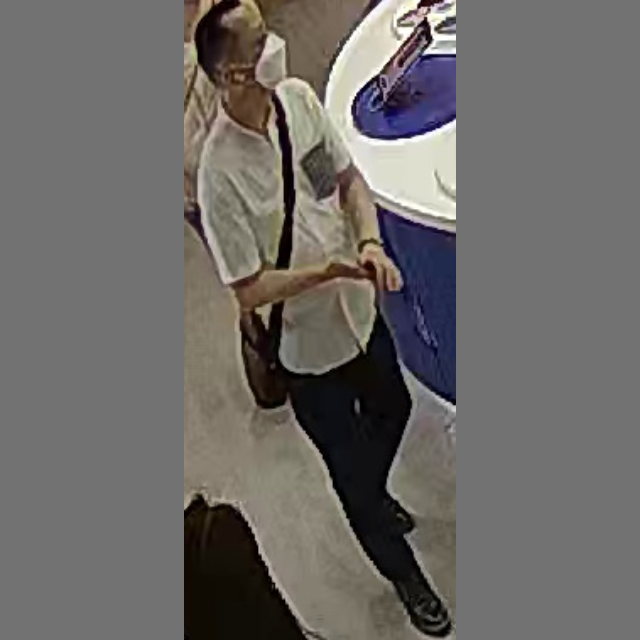

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = img.copy()
image, ratio, dwdh = letterbox(image, auto=False)
image_ = image.copy()
image_ = image_
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, 0)
image = np.ascontiguousarray(image)

im = image.astype(np.float32)
im = np.tile(im,[128,1,1,1])
im.shape
image_.shape
Image.fromarray(image_)

Cost 0.34117470495402813 s, avg 37517.43553709454


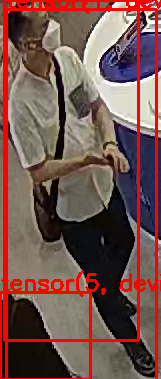

In [5]:
im = torch.from_numpy(im).to(device)
im/=255
im.shape

# warmup for 10 times
for _ in range(10):
    tmp = torch.randn(1,3,640,640).to(device)
    binding_addrs['images'] = int(tmp.data_ptr())
    context.execute_v2(list(binding_addrs.values()))

start = time.perf_counter()

loops = 100
batch =128
for i in range(loops):
    binding_addrs['images'] = int(im.data_ptr())
    context.execute_v2(list(binding_addrs.values()))
diff = time.perf_counter()-start
print(f'Cost {diff} s, avg {(loops*batch/diff)}')

nums = bindings['num_dets'].data
boxes = bindings['det_boxes'].data
scores = bindings['det_scores'].data
classes = bindings['det_classes'].data
nums.shape,boxes.shape,scores.shape,classes.shape

boxes = boxes[0,:nums[0][0]]
scores = scores[0,:nums[0][0]]
classes = classes[0,:nums[0][0]]

for box,score,cl in zip(boxes,scores,classes):
    box = postprocess(box,ratio,dwdh).round().int()
    name = str(cl)
    color = (255,0,0)
    name += ' ' + str(round(float(score),3))
    cv2.rectangle(img,tuple(box[:2].tolist()),tuple(box[2:].tolist()),color,2)
    cv2.putText(img,name,(int(box[0]), int(box[1]) - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,color,thickness=2)
Image.fromarray(img)